In [1]:
import sys, os
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
filepath = os.path.join("..", "data", "bank-additional", "bank-additional-full.csv")
df = pd.read_csv(filepath, sep = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.columns

Index([&#39;age&#39;, &#39;job&#39;, &#39;marital&#39;, &#39;education&#39;, &#39;default&#39;, &#39;housing&#39;, &#39;loan&#39;,
       &#39;contact&#39;, &#39;month&#39;, &#39;day_of_week&#39;, &#39;duration&#39;, &#39;campaign&#39;, &#39;pdays&#39;,
       &#39;previous&#39;, &#39;poutcome&#39;, &#39;emp.var.rate&#39;, &#39;cons.price.idx&#39;,
       &#39;cons.conf.idx&#39;, &#39;euribor3m&#39;, &#39;nr.employed&#39;, &#39;y&#39;],
      dtype=&#39;object&#39;)

### Change target col to binary numeric column

In [4]:
target_col = "subscribed"

df[target_col] = df["y"].map({"no": 0, "yes": 1})
df.drop(columns = "y", inplace = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [5]:
numeric_cols = df._get_numeric_data().columns
categorical_cols = set(df.columns) - set(numeric_cols)
categorical_cols

{&#39;contact&#39;,
 &#39;day_of_week&#39;,
 &#39;default&#39;,
 &#39;education&#39;,
 &#39;housing&#39;,
 &#39;job&#39;,
 &#39;loan&#39;,
 &#39;marital&#39;,
 &#39;month&#39;,
 &#39;poutcome&#39;}

day_of_week
Category subscription rates:
mon: 0.099
tue: 0.118
wed: 0.117
thu: 0.121
fri: 0.108


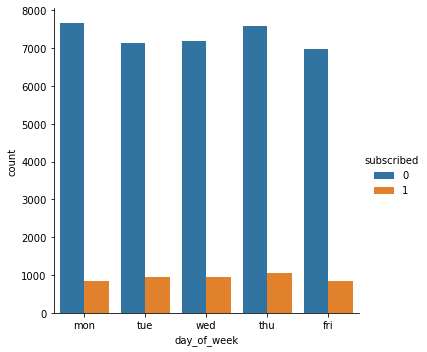

default
Category subscription rates:
no: 0.129
unknown: 0.052
yes: 0.000


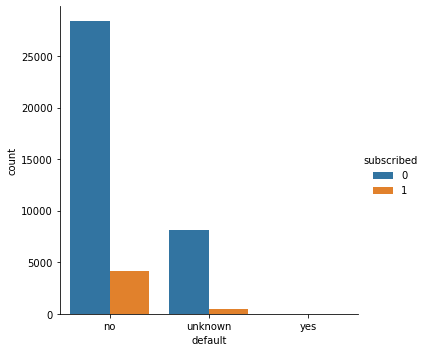

poutcome
Category subscription rates:
nonexistent: 0.088
failure: 0.142
success: 0.651


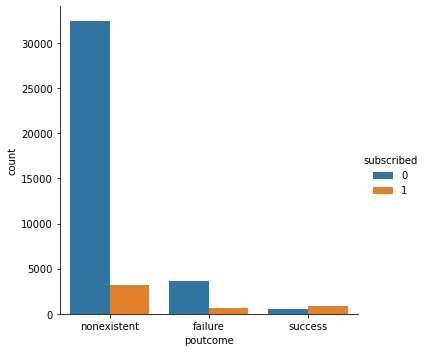

job
Category subscription rates:
housemaid: 0.100
services: 0.081
admin.: 0.130
blue-collar: 0.069
technician: 0.108
retired: 0.252
management: 0.112
unemployed: 0.142
self-employed: 0.105
unknown: 0.112
entrepreneur: 0.085
student: 0.314


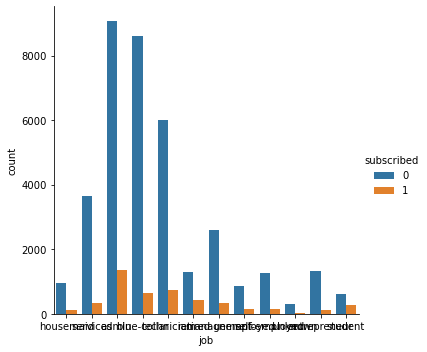

education
Category subscription rates:
basic.4y: 0.102
high.school: 0.108
basic.6y: 0.082
basic.9y: 0.078
professional.course: 0.113
unknown: 0.145
university.degree: 0.137
illiterate: 0.222


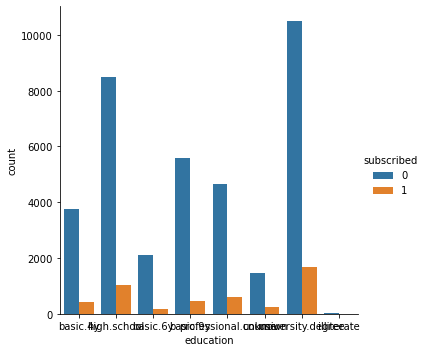

housing
Category subscription rates:
no: 0.109
yes: 0.116
unknown: 0.108


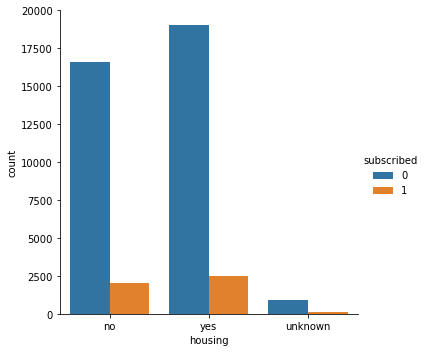

month
Category subscription rates:
may: 0.064
jun: 0.105
jul: 0.090
aug: 0.106
oct: 0.439
nov: 0.101
dec: 0.489
mar: 0.505
apr: 0.205
sep: 0.449


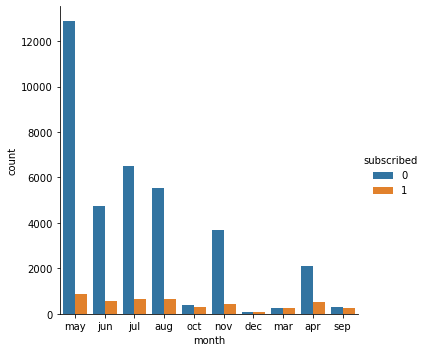

marital
Category subscription rates:
married: 0.102
single: 0.140
divorced: 0.103
unknown: 0.150


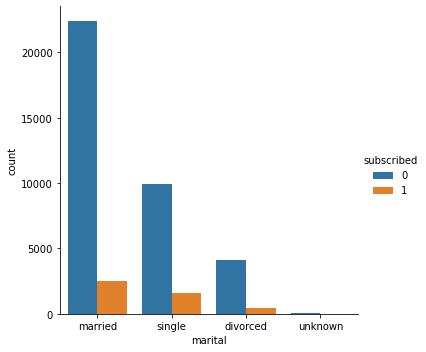

contact
Category subscription rates:
telephone: 0.052
cellular: 0.147


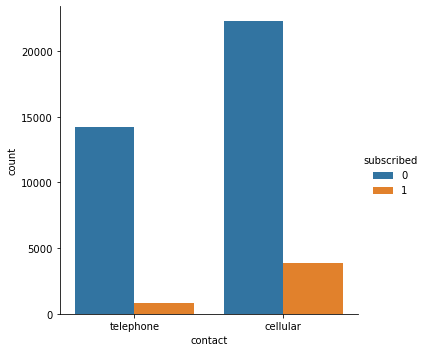

loan
Category subscription rates:
no: 0.113
yes: 0.109
unknown: 0.108


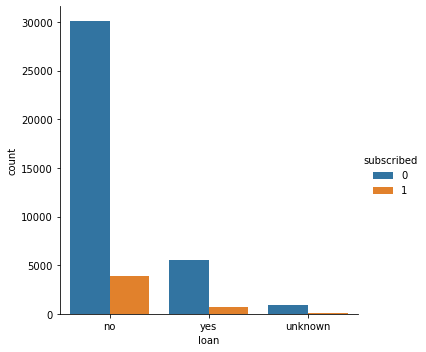

In [6]:
for col in categorical_cols:
    print(col)
    categories = df[col].unique()
    category_and_outcome_counts = df.groupby([col, target_col]).count().iloc[:, 0]
    category_counts = df.groupby(col).count().iloc[:, 0]
    print("Category subscription rates:")
    for cat in categories:
        try:
            print(f"{cat}: {category_and_outcome_counts.loc[cat].loc[1]/category_counts.loc[cat]:.3f}")
        except KeyError:
            print(f"{cat}: {0.0:.3f}")
    ax = sns.catplot(x=col, kind="count", hue=target_col, data=df)
    plt.show()

## Mes e ano não precisam ser variáveis categoricas

Transformando-as para variáveis contínuas usando seno e cosseno para manter a noção e circularidade (dezembro proximo a janeiro, por exemplo)

In [7]:
month_mapper = {v.lower(): k for k,v in enumerate(calendar.month_abbr)}
day_maper = {'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6}

df["month_cos"] = np.cos(2*np.pi*(df["month"].map(month_mapper) - 1)/12)
df["month_sin"] = np.sin(2*np.pi*(df["month"].map(month_mapper) - 1)/12)

df["weekday_cos"] = np.cos(2*np.pi*(df["day_of_week"].map(day_maper) - 1/2)/7)
df["weekday_sin"] = np.sin(2*np.pi*(df["day_of_week"].map(day_maper) - 1/2)/7)

df.drop(columns = ["month", "day_of_week"], inplace = True)

### A coluna de "default" contém principalmente os valores "no" ou "unknown", e apenas 3 valores "yes", e nestes 3 casos, o valor da variável dependente é 0. Assim, este valor não contém informação estatisticamente relevante para a predição da variável dependente, de forma que podemos excluir os 3 registros e codificá-la como uma variável binária. 

In [8]:
df = df[df["default"] != "yes"]
df["default"] = df["default"].map({"no": 0, "unknown": 1})

### A coluna housing também contém valores "yes", "no" e "unknown", porém "unknown" aparece em poucos registros, e não parece alterar a taxa de subscrição. Assim, podemos remover os registros que contém este valor e transformar a variável categórica em binária

In [9]:
df = df[df["housing"] != "unknown"]
df["housing"] = df["housing"].map({"no": 0, "yes": 1})

### O mesmo vale para a coluna "loan"

In [10]:
df = df[df["loan"] != "unknown"]
df["loan"] = df["loan"].map({"no": 0, "yes": 1})

### A coluna "poutcome" contém o resultado da última chamada, podendo conter o valor "non existent" se não houve uma chamada anterior para este cliente. Assim, codificamos esta coluna em duas, sendo "poutcome_failure" = 1 se poutcome = "failure", "poutcome_success" = 1 se poutcome = "success", e ambas 0 se poutcome = "non existent"

In [11]:
df["poutcome_failure"] = df["poutcome"].map({"nonexistent": 0, "failure": 1, "success": 0})
df["poutcome_failure"] = df["poutcome"].map({"nonexistent": 0, "failure": 0, "success": 1})
df.drop(columns = ["poutcome"], inplace = True)

### O mesmo pode ser feito para a coluna "marital", contendo as categorias 'married', 'single', 'divorced' e 'unknown'

In [12]:
df["marital_single"] = df["marital"].map({"married": 0, "single": 1, "divorced": 0, "unknown": 0})
df["marital_married"] = df["marital"].map({"married": 1, "single": 0, "divorced": 0, "unknown": 0})
df["marital_divorced"] = df["marital"].map({"married": 0, "single": 0, "divorced": 1, "unknown": 0})
df.drop(columns = ["marital"], inplace = True)

### A coluna contact pode ser codificada de forma binária, sendo contact = 0 para telefone e 1 para celular

In [13]:
df["contact"] = df["contact"].map({"telephone": 0, "cellular": 1})

### Por fim, as colunas "job" e "education" podem ser codificadas tratadas a codificação one-hot

In [14]:
df = pd.get_dummies(df)
df.drop(columns = ["job_unknown", "education_unknown"], inplace = True)

In [15]:
df.shape

(40195, 41)

### Ao final do preprocessamento, temos um dataframe com 41 colunas, sendo uma a variável dependente, e 40195 observações. Mesmo com as remoções, ainda acredita-se que há dados suficientes para o treinamento, visto que há 100 vezes mais observações do que possíveis features. Como esta proporção é grande, também não será realizada nenhuma tentativa de redução de dimensionalidade através de métodos como PCA. Por fim, a coluna "duration" deve ser removida do dataset, pois é uma informação que está disponível apenas após ligação ser efetuada. Assim, ela não pode ser utilizada como variável preditiva do resultado da chamada.

In [16]:
df.drop(columns = ["duration"], inplace = True)
df.rename(columns = {"campaign": "n_contacts_current", "previous": "n_contacts_previous"}, inplace = True)

In [17]:
if not os.path.exists(os.path.join("..", "data", "preprocessed")): os.mkdir(os.path.join("..", "data", "preprocessed"))
df.to_csv(os.path.join("..", "data", "preprocessed", "bank-additional-full-preprocessed.csv"), index = False)